[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Post: 1 | Sentiment Score: -0.2411
Post: 2 | Sentiment Score: -0.7845
Post: 3 | Sentiment Score: 0.0
Post: 4 | Sentiment Score: 0.9381
Post: 5 | Sentiment Score: 0.9664
Post: 6 | Sentiment Score: 0.0
Post: 7 | Sentiment Score: 0.8658
Post: 8 | Sentiment Score: 0.8676
Post: 9 | Sentiment Score: -0.25
Post: 10 | Sentiment Score: -0.7506
Post: 11 | Sentiment Score: 0.5859
Post: 12 | Sentiment Score: 0.9797
Post: 13 | Sentiment Score: 0.3802
Post: 14 | Sentiment Score: 0.0
Post: 15 | Sentiment Score: 0.9097
Post: 16 | Sentiment Score: 0.9758
Post: 17 | Sentiment Score: 0.5574
Post: 18 | Sentiment Score: 0.9769
Post: 19 | Sentiment Score: 0.7177
Post: 20 | Sentiment Score: 0.7829
Post: 21 | Sentiment Score: 0.0
Post: 22 | Sentiment Score: 0.1179
Post: 23 | Sentiment Score: 0.4215
Post: 24 | Sentiment Score: 0.0671
Post: 25 | Sentiment Score: 0.0
Post: 26 | Sentiment Score: 0.4664
Post: 27 | Sentiment Score: 0.9599
Post: 28 | Sentiment Score: 0.9215
Post: 29 | Sentiment Score: 0.8894
Post: 3

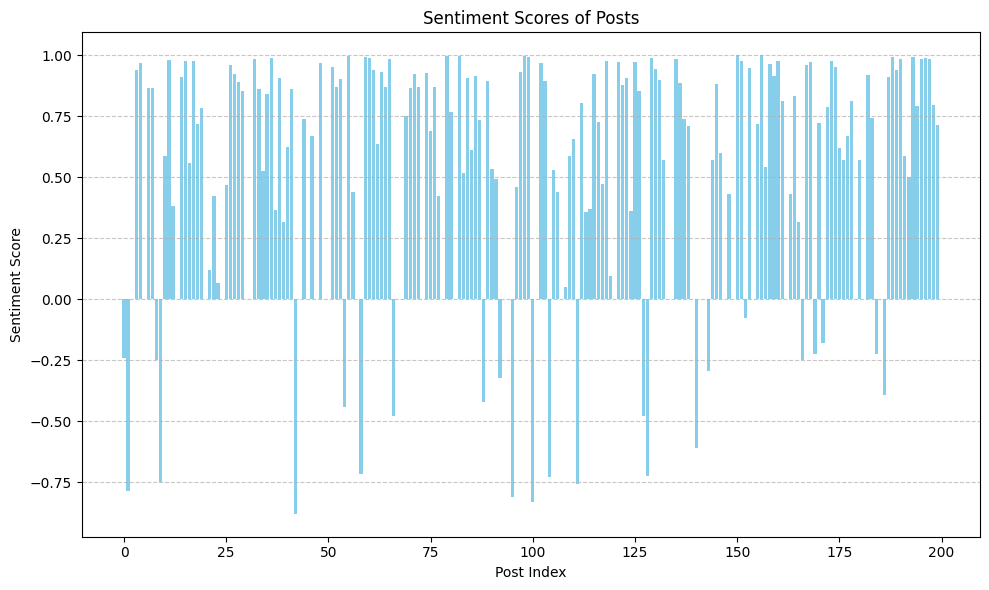

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('vader_lexicon')

# Function for performing VADER sentiment analysis on the post titles
def vaderSentimentAnalysis(sPostsFilename, bPrint=False):
    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Open the Reddit JSON file
    with open(sPostsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

    lSentiment = []

    # Loop through each post in the dump
    i = 0
    for submission in redditDump:
        i += 1
        postText = submission['title'] + " " + submission['text']
        postDate = submission['created']  # Timestamp can be used later if needed

        # Perform sentiment analysis using VADER
        sentiment = analyzer.polarity_scores(postText)
        score = sentiment['compound']  # Compound score gives overall sentiment
        
        lSentiment.append(score)

        if bPrint:
            print(f"Post: {i} | Sentiment Score: {score}")
            
    
    return lSentiment

# Path to the JSON file
redditFile = 'asian_beauty_top_200_2024.json'

# Perform sentiment analysis
sentiment_scores = vaderSentimentAnalysis(redditFile, bPrint=True)

# Prepare the DataFrame with sentiment scores and post indices
posts_data = []
with open(redditFile, 'r', encoding='utf-8') as f:
    redditDump = json.load(f)

for i, submission in enumerate(redditDump):
    sentimentScore = sentiment_scores[i] if i < len(sentiment_scores) else 0  # Prevent index error
    posts_data.append({'index': i, 'sentiment': sentimentScore})

# Convert the list to a DataFrame
posts_df = pd.DataFrame(posts_data)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar chart with post indices on x-axis and sentiment scores on y-axis
plt.bar(posts_df['index'], posts_df['sentiment'], color='skyblue')

# Add labels and title
plt.xlabel('Post Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Posts')

# Add a grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
